# Section A: Simulating a Buck Converter

#### Task 1.

Simscape contains a Buck Converter block that captures the key dynamics of a buck converter.
 
The block has several parameter groups to allow you to accurately describe your circuit based on a datasheet or design document.

Add a Buck Converter from the __Simscape > Electrical > Semiconductors & Converters > Converters library__.
 
Double-click the block to open the Block Parameters dialog. Set the following properties: <br>
__Threshold Voltage__: 0.5 V <br>
__Inductance__: 250 uH <br>
__Inductor Series Resistance__: 0 Ohm <br>
__Capacitance__: 50 uF

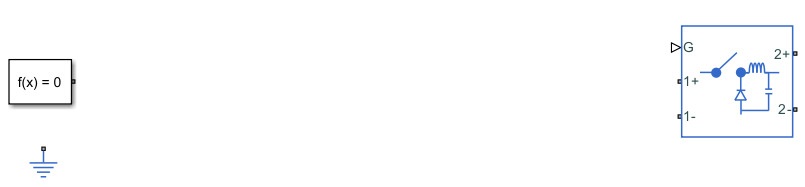

#### Task 2.

Electric vehicles commonly use a 48 volt battery to power a 12 volt network. Buck converters are used to step down the voltage.

Add a DC Voltage Source from the __Simscape Foundation Library > Electrical > Electrical Sources Library__.
 
Set its __Constant Voltage__ to 48 V.

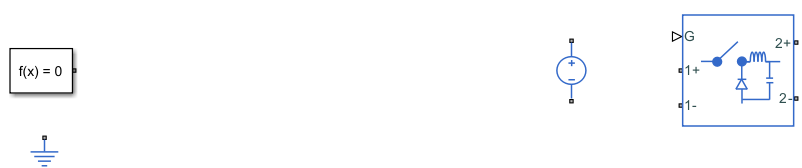

#### Task 3.

The 1+ and 1- ports on the Buck Converter block represent the positive and negative input terminals, respectively.

Connect the positive port of the DC Voltage Source to the 1+ port of the Buck Converter.
 
Connect the negative port of the DC Voltage Source to the 1- port of the Buck Converter and the Electrical Reference block.

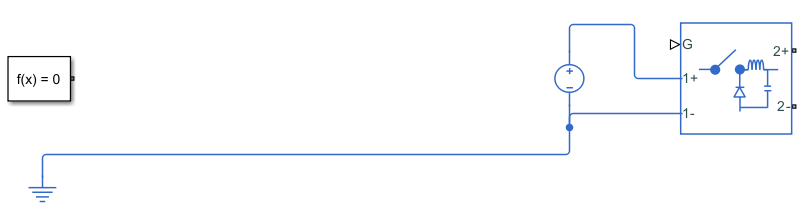

#### Task 4.

The 2+ and 2- ports represent the positive and negative output terminals, respectively. Connect these to the load being powered.
 
You will add a Resistor to represent a load.

Add a Resistor block (__Foundation Library > Electrical > Electrical Elements__) to the model. Set its __Resistance__ to 2 Ohm.

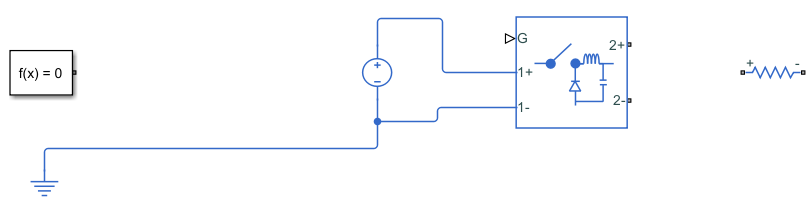

#### Task 5.

Recall that in the Simscape Electrical domain, the voltage across a component is given as $V = V_{+} – V_{-}$.

Connect the 2+ port of the Buck Converter to the positive port of the Resistor.
 
Connect the 2- port of the Buck Converter to the negative port of the Resistor.

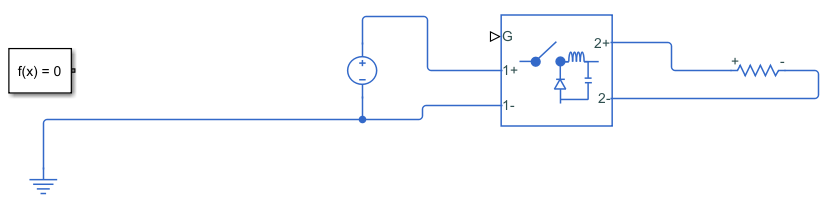

#### Task 6.

The G port of the Buck Converter is the gate control signal for the buck converter switch. When the value of the signal connected to G is higher than the __Threshold Voltage__ parameter, the device is on (switch closed).
 
You will use the PWM Generator block to produce the signal that controls the switch. The PWM Generator block generates a constant PWM signal with a duty cycle specified by its input port. This duty cycle must be between 0 and 1.
 
The __Timer Period__ parameter represents the PWM period, which is 1/$f_{sw}$, where $f_{sw}$ is the switching frequency.
 
The block __Sample Time__ affects the resolution of the duty cycle signal. It should be between 1/20th and 1/200th of the __Timer Period__. Larger values will speed up simulation, while smaller values will yield higher accuracy.

Add the following blocks to your model. <br>
Constant (__Simulink > Sources__) <br>
PWM Generator (__Simscape > Electrical > Control > Pulse Width Modulation__) <br>
Simulink-PS Converter (__Simscape > Utilities__)

Set the parameters for the PWM Generator block. The variable $f_{sw}$ is defined in the MATLAB workspace as 110e3 (Hz). <br>
__Timer Period__: 1/$f_{sw}$ <br>
__Sample Time__: 1/$f_{sw}$/100.

Connect the Constant block to the PWM Generator input port to represent the duty cycle. Connect the PWM Generator to the G port of the Buck Converter via the Simulink-PS Converter.
 
If you have not already, connect the Solver Configuration block to any wire in the electrical circuit to allow your model to simulate.

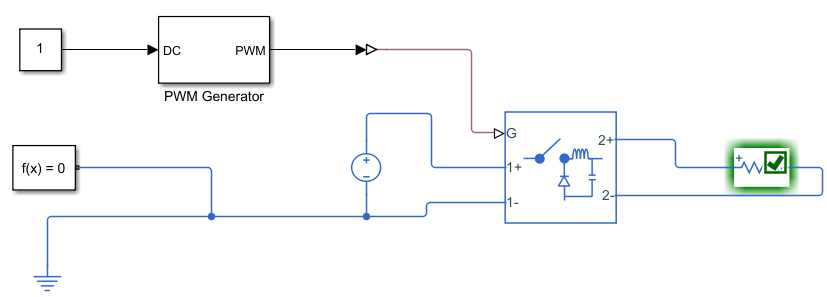

#### Task 7.

The output voltage for an ideal buck converter operating in continuous current mode is $V_{out} = DV_{in}$.
 
To produce a 12V output for a 48V input, you need a duty cycle of 25%.

Set the __Constant Value__ of the Constant block to 0.25.

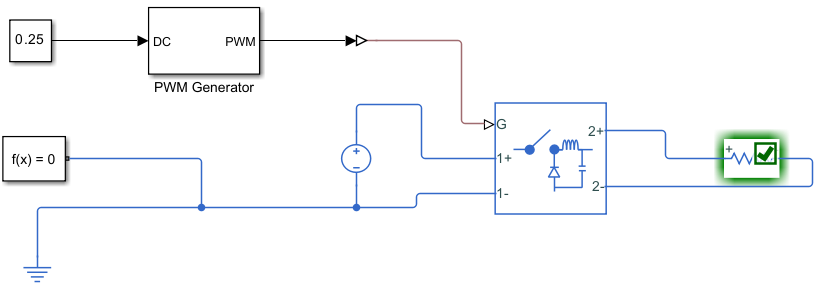

#### Task 8.

Power electronics circuits are generally what are known as stiff systems: they have an overall system response at one timescale and switching dynamics at a much faster time scale.

The solver _ode23t_ is the most common choice for power electronics systems. It simulates quickly while still capturing the essential dynamics.

In the __Modeling__ tab, click __Model Settings__. In the Solver pane of the dialog box that opens, change the __Solver__ from _auto_ to _ode23t_.

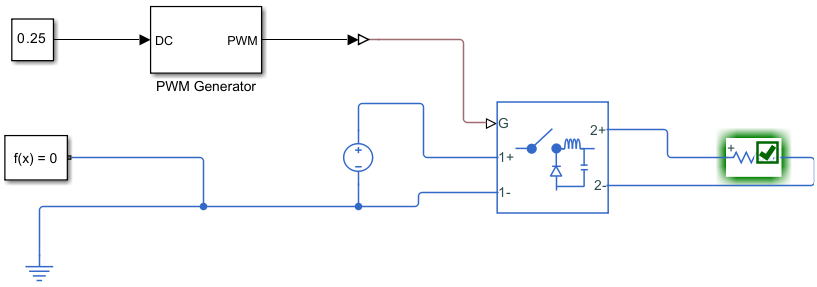

# Section B: Probing Internal Variables

#### Task 9.

There are several ways to measure data in Simscape. The Sensors library contains blocks that allow you to produce a Simulink signal from measurements in the model.

Add a Voltage Sensor and PS-Simulink Converter to your model.
 
Connect the Voltage Sensor in parallel with the load Resistor. Then connect the Voltage Sensor measurement port to the Signal Assessment block via the PS-Simulink Converter.
 
Reminder: You can change the block orientation using the __Format__ tab. This can keep your connection lines organized.

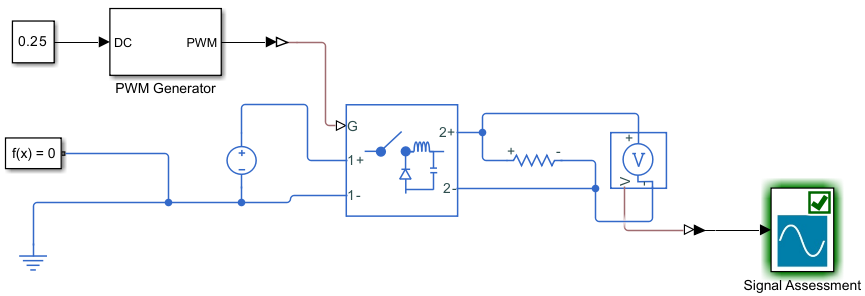

#### Task 10.

Some blocks, like the Buck Converter, have variables that are not accessible using the available sensors. You can use a Probe block to select variables and output them as a Simulink signal.

Add a Probe block from the __Simscape > Utilities Library__.
 
Add a Scope block and connect the Voltage measurement to it. This will prevent unconnected line warnings when you run your model.

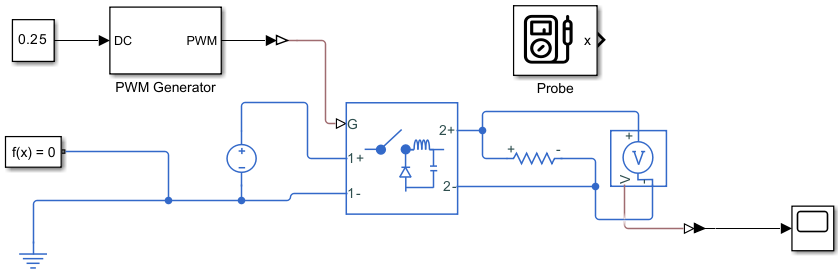

#### Task 11.

After you attach (bind) a Probe block to a Simscape block in your model, each block variable you select will be output as a separate signal.

Bind the Probe block to the inductor current, _iL_, for the buck converter.
1. Double-click the Probe block. <br>
2. Click on the Buck Converter block. <br>
3. From the context menu, select __Inductor Current__: _iL_. <br>
4. Close the yellow notification bar hint if necessary, then click the X in the upper-right corner of the model canvas.

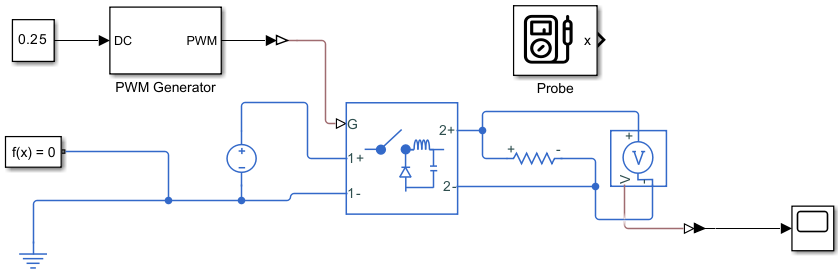

#### Task 12.

The Probe output ports generate Simulink signals, so there is no need to add a PS-Simulink Converter.

Connect the inductor current measurement to the Signal Assessment block.

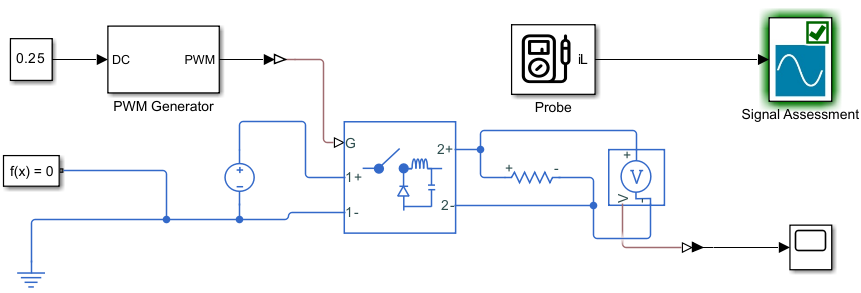

# Section C: Average Switch Buck Converter Model

In the previous section, you used the Buck Converter block with the switch represented as an Ideal Semiconductor Switch. This captured the switching dynamics, but was not specific to any semiconductor device.
 
The Buck Converter block can also be configured to use other representations for switching devices. Some of these configurations rely on additional parameters to accurately represent a particular component, such as an IGBT.
 
You can also choose a coarser model by selecting Averaged Switch. In this lesson, you will explore this option.

#### Task 13.

Add a Buck Converter block to the model. Connect it to the voltage source and the load.

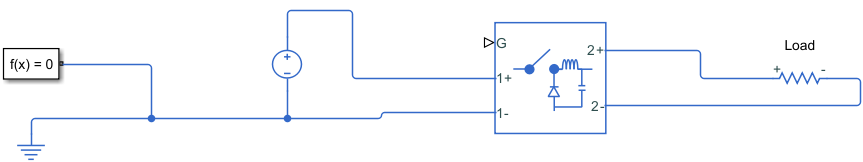

#### Task 14.


As the name implies, this averages the effects of the switch behavior and does not include the charging and discharging effects of the switch.

Set the following parameters for the Buck Converter block. <br>
__Switching Device__: Averaged Switch <br>
__Inductance__: 250 uH <br>
__Capacitance__: 50 uF

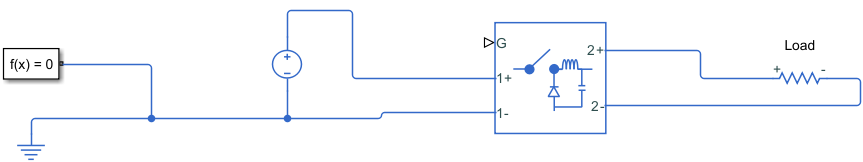

#### Task 15.

With the Averaged Switch Model, the gate control port, G, expects a duty cycle input. You should not create a PWM signal.

Add a Constant block (__Simulink > Sources__) to the model and set the Constant Value parameter to 0.25.
 
Add a Simulink-PS Converter block and make the connections so that the Constant block provides the duty cycle to the gate control port of the Buck Converter block.

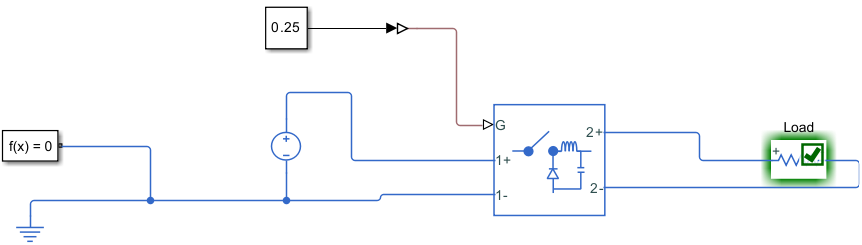

#### Task 16.

In the previous task, you could see that the voltage across the load showed the overall response of the buck converter circuit, including the dynamics from the LC filter. However, the high-frequency switching is averaged.
 
You can also probe the inductor current.

Add a Probe block to the model and bind it to the inductor current.
 
Connect the inductor current measurement to the Signal Assessment block.

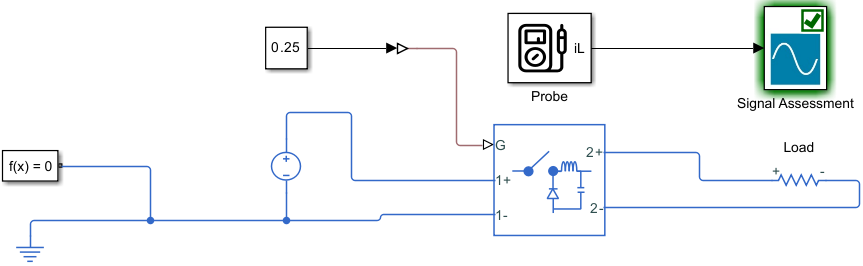

#### Task 17.

In this training environment, relevant model outputs are displayed for you in the Assessment Pane. As you develop your own simulations, you can use Probe blocks to produce a Simulink signal from any Simscape block variable.

Add a second Probe block to the model. Bind it to the voltage, v, of the load Resistor.
 
Add a Scope block to the model. Connect both Probe measurements to the Scope.

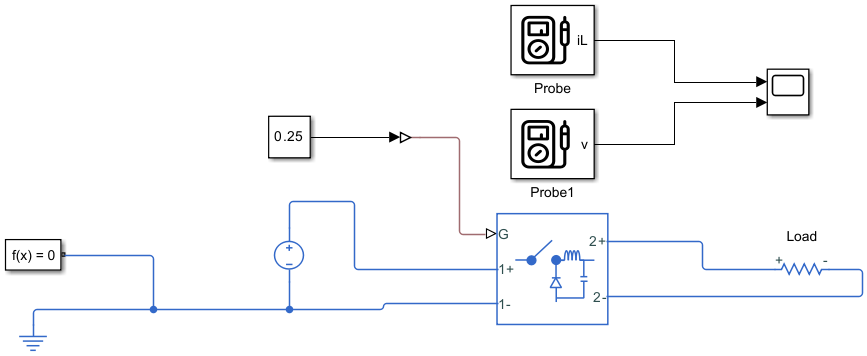

# Section D: Behavioral Buck Converter Model

The Average-Value DC-DC Converter block, also located in the Electrical > Semiconductors & Converters > Converters library, provides an even coarser representation of a buck converter.
 
It represents a controlled, idealized DC-DC conversion. This is known as a behavioral model. When configured as a buck converter, the following input-output relationships apply.

The LC circuit dynamics and any losses are not included in this representation. As with the averaged switching model, there is no need to specify a stiff solver.

#### Task 18.

Replace the Buck Converter block with the Average-Value DC-DC Converter. Make the same connections between the 1 ports and 2 ports. Connect the Simulink-PS Converter block to the DutyCycle port.
 
Buck Converter is already set as the default __Converter Type__.

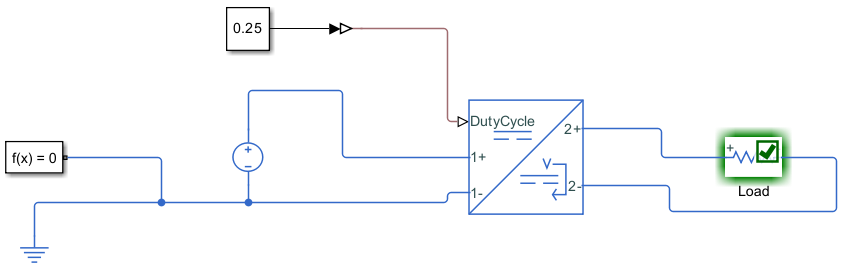

# Section E: Non-Linear Buck Converter Model

Recall the buck converter circuit.

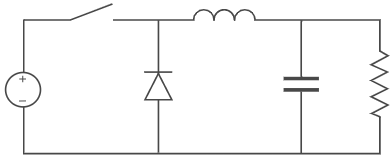

#### Task 19.

Add an Inductor and a Capacitor from the __Simscape Foundation Library > Electrical > Electrical Elements Library__.
 
Set the __Inductor Inductance__ to 250 uH. <br>
Set the __Capacitor Capacitance__ to 50 uF.

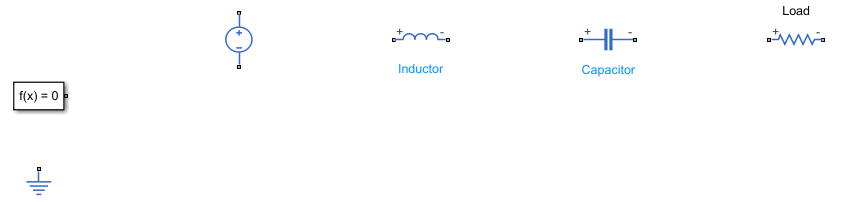

#### Task 20.

In practice, the switch in a buck converter comprises two components: a diode and a semiconductor device. Common semiconductor devices are the GTO, IGBT, or MOSFET. (You may have noticed that these are all options for the __Switching Device__ parameter on the Buck Converter block.)
 
In this activity, you will model a Buck Converter that uses an N-Channel MOSFET as the switch. When designing a buck converter circuit, you will likely choose the parts and parameters using product datasheets. You can enter the relevant values from the datasheets into the Block Parameters dialog.

Add an N-Channel MOSFET and a Diode, both from the __Simscape > Electrical > Semiconductors & Converters Library__.
 
Set the following parameters for the N-Channel MOSFET block: <br>
__Drain-Source On resistance__, R_DS(on): 11.7e-3 Ohm <br>
__Gate-Source Threshold Voltage__, Vth: 3 V

Set the following parameters for the Diode block: <br>
__Forward Voltage__: 0.6 V <br>
__On Resistance__: 11.7e-3 Ohm <br>
__Off Conductance__: 1e-5 S <br>

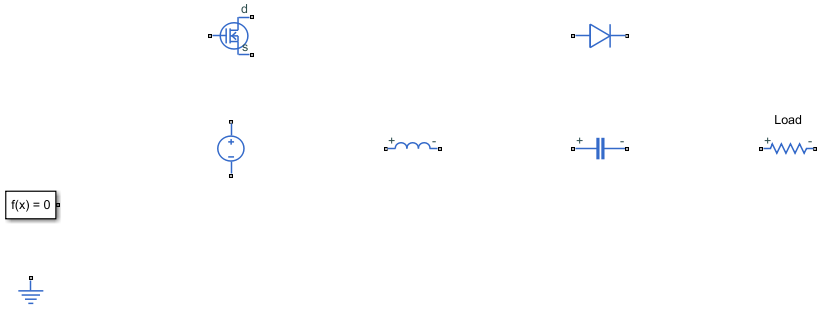

#### Task 22.

Make the connections to match the circuit diagram, using the N-Channel MOSFET block to represent the switch.
 
The drain port, _d_, should be connected to the voltage source. The source port, _s_, should be connected to the diode and inductor.

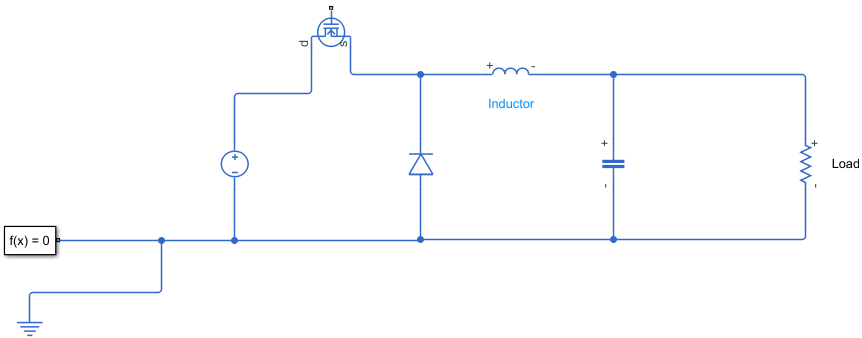

#### Task 23.

An integrated circuit called a gate driver is used to control the gate, or switch, of a MOSFET. The gate driver receives a low-power PWM signal and amplifies it to produce the high current required to drive a MOSFET gate.
 
The Simscape Gate Driver block provides a generic representation of this circuit. By default, it accepts a physical signal representing the PWM value.You can also configure the block to accept electrical domain signals as the PWM input. Use this variant if you would like to model upstream circuit components in Simscape.

When using this option, the __Input Logic__ parameters represent the threshold values for determining the logical value of the driver. The __Outputs__ represent the Gate Driver output voltage in each logical state.

Add a Gate Driver block (__Electrical > Semiconductors & Converters__) to the model.
 
Select the block and use __Simscape Block > Modeling Option__ to select the Electrical input ports configuration.Leave the other default parameters unchanged.

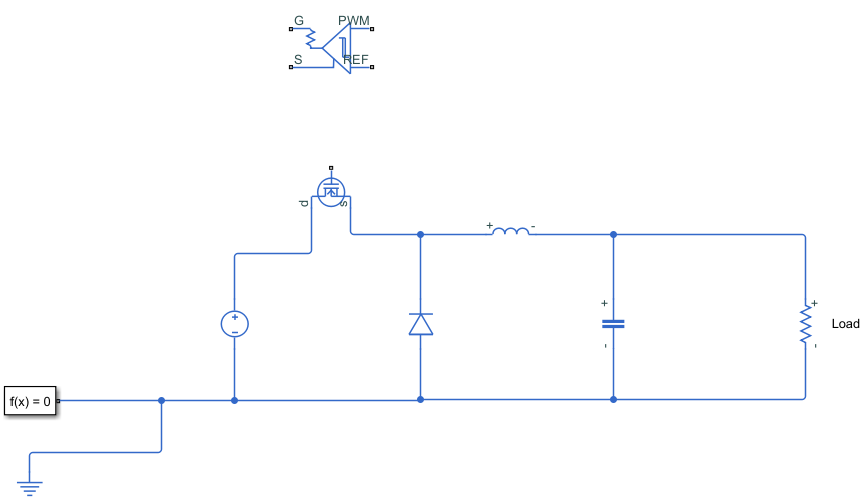

#### Task 24.

The Controlled PWM Voltage block (__Electrical > Integrated Circuits__) produces a PWM Voltage signal in the electrical domain. The ports PWM and REF together represent the control voltage. The PWM port provides the pulse-width modulated signal that interfaces with the Gate Driver block PWM port. Similarly, the REF port interfaces with the Gate Driver REF port. However, the REF port represents a floating reference. Therefore, you must also connect this to an Electrical Reference block when using it with a Gate Driver.
 
Like the Gate Driver block, the Controlled PWM Voltage block can be configured to take either a physical signal or electrical domain signals as inputs. In the physical signal input configuration, you can directly specify the duty cycle. The block will then output the appropriate PWM voltage based on the block parameters.

1. Add a Controlled PWM Voltage block to the model. <br>
2. Choose PS Input as the __Modeling Option__. <br>
3. Set the __PWM Frequency__ to 110 kHz. <br>
4. Connect the PWM and REF ports on the Controlled PWM Voltage and Gate Driver blocks. <br>
5. Add an Electrical Reference and connect it to the REF ports.

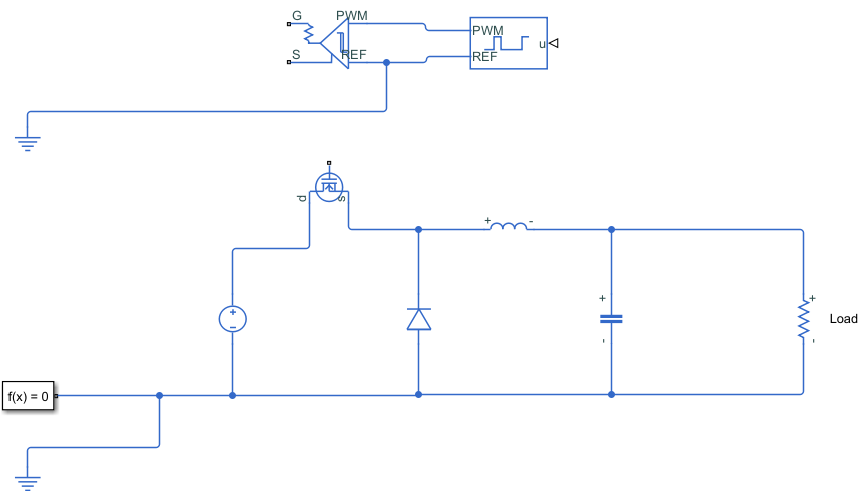

#### Task 25.

The u port of the Controlled PWM Voltage accepts a physical signal value between 0 and 1.

Add a Constant block (__Simulink > Sources__) and Simulink-PS Converter block (__Simscape > Utilities__) to your model. Set the __Constant Value__ to 0.25.
 
Connect the blocks so that the Constant block sets the duty cycle for the Controlled PWM Voltage block.

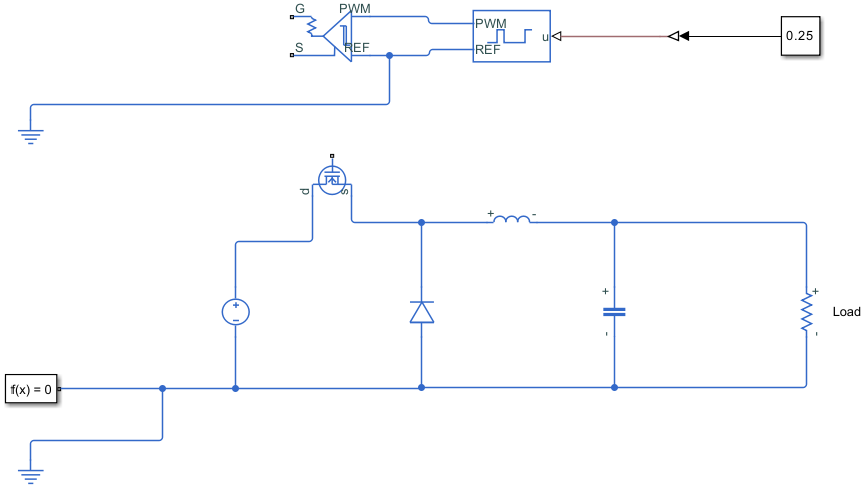

#### Task 26.

Finally, you will complete the circuit by connecting the gate driver to the MOSFET.
 
Current flows in an N-Channel MOSFET when the voltage applied between the gate and the source exceeds the threshold voltage. Correspondingly, the Gate Driver block has ports marked G and S, indicating the gate and source connections.
TASK
Connect the G port of the Gate Driver to the gate port (currently unconnected) of the N-Channel MOSFET.
 
Connect the S port of the Gate Driver to the source port(s) of the N-Channel MOSFET.
 
Set the __Solver__ to _ode23t_.

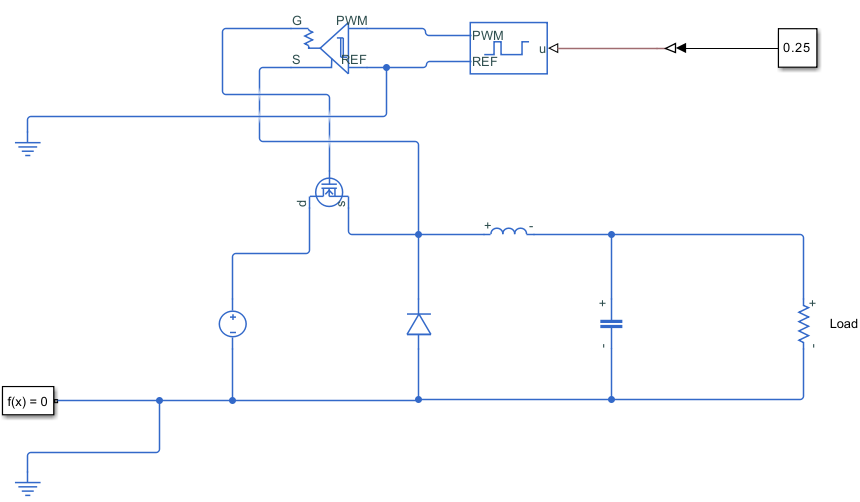

#### Task 27.

In this activity, you will control the load voltage using the PID Controller block in Simulink. To achieve this, you must convert your output variable from a Simscape value to a Simulink signal.

Add a Voltage Sensor block (__Foundation Library > Electrical Sensors__) and a PS-Simulink Converter block (__Simscape > Utilities__) to the model.
 
Connect the Voltage Sensor so that it measures the load resistor voltage as a positive value. Then connect the measurement to the PS-Simulink Converter.

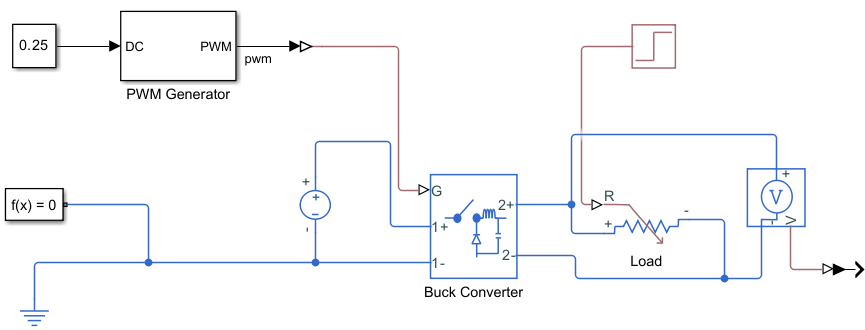

#### Task 28.

The Constant block in the model sets a fixed duty cycle. This needs to be replaced by the command signal from the controller.
TASK
Delete the Constant block connected to the PWM Generator block.
 
Then add these Simulink blocks to your model. <br>
Step: __Simulink > Sources__ <br>
Sum: __Simulink > Math Operations__ <br>
Discrete: __PID Controller Simulink > Discrete__

 
Set the Sum block __List of Signs__ to |+-. (Recall that a | in the __List of Signs__ adds a spacer, making the block visually appropriate for control system diagrams.)

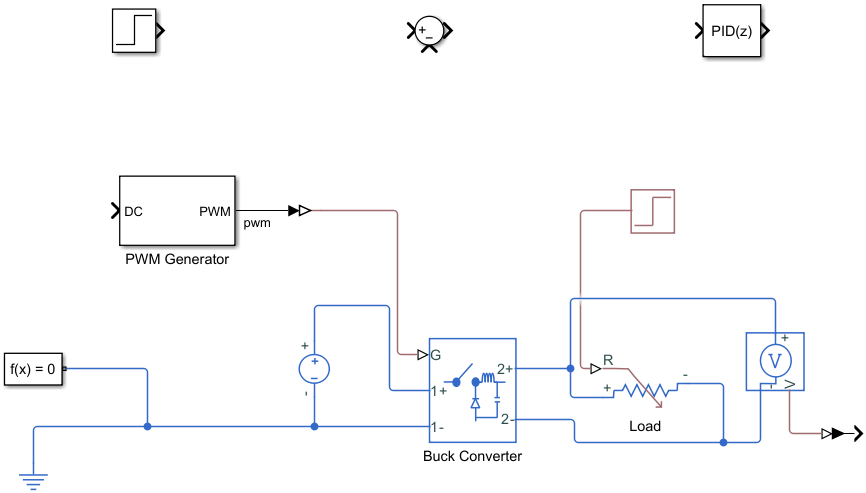

#### Task 29.

The Simscape model represents a continuous-time system, while the controller is a discrete-time block. You will use a Rate Transition block to explicitly model the analog-to-digital conversion between the Simscape sensor and controller. The Rate Transition block will behave as a zero-order hold in this case: sampling the signal originating from the sensor and holding it for the specified time.
 
You will also need to break the algebraic loop that arises when connecting your Simscape plant with a feedback loop. In this model, you will break the algebraic loop by including a delay between the Discrete PID Controller block and the PWM Generator block. This represents the computation delay of the digital controller. Simulink has multiple ways to model a delay; you will use another Rate Transition block in this lesson.

Add two Rate Transition blocks (__Simulink > Signal Attributes__) to your model.

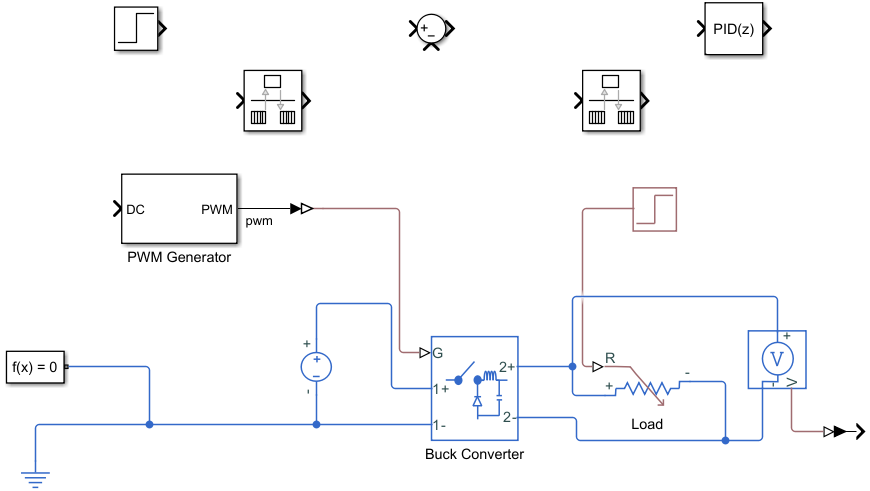

#### Task 30.

The complete control loop is shown in the diagram, where the plant includes the PWM Generator.

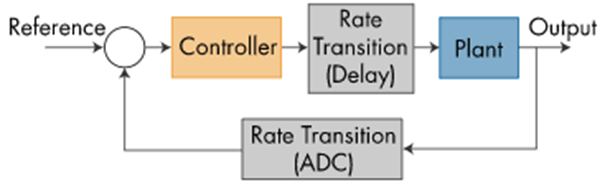

Make the connections to complete the control loop.

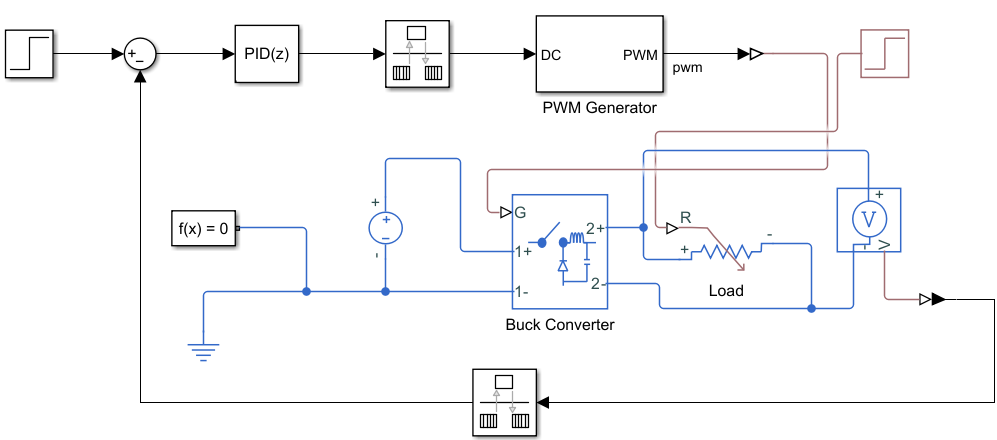

#### Task 31.

The Step block represents your reference signal for the desired load voltage. In this task, you will specify a reference signal that begins at 12 V and changes to 6 V at t = 0.02 seconds in the simulation.

Set these parameters on the Step block: <br>
__Step Time__: 0.02 <br>
__Initial Value__: 12 <br>
__Final Value__: 6

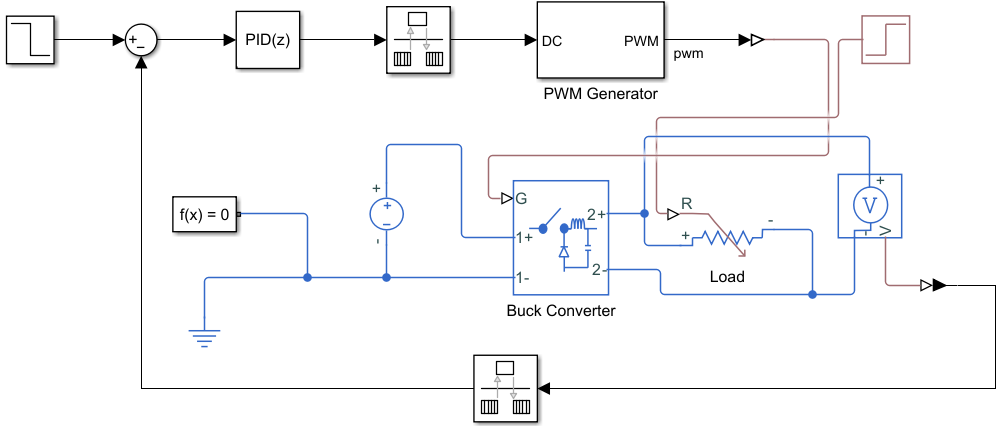

#### Task 32.

Finally, you will set the controller gains and rate.
 
You should also specify a sample time for the controller. The Discrete PID Controller block has the __Time Domain__ parameter set to __Discrete-Time__. This means it will update at the interval specified by the __Sample Time__. Since the fastest dynamic is the switching time, this is a good choice for the controller sample time. The switching frequency has been defined as $f_{sw}$ in the MATLAB workspace.
 
You also need to specify the __Output Port Sample Time__ for the Rate Transition block that connects the Simscape measurement to the control loop.

Set these parameters on the Discrete PID Controller block. <br>
__Proportional (P)__: 0.10 <br>
__Integral (I)__: 352 <br>
__Derivative (D)__: 7.6e-6 <br>
__Filter Coefficient (N)__: 1.4e5 <br>
__Sample Time__: 1/$f_{sw}$

On the Rate Transition block that is in the feedback path, set the __Output Port Sample Time__ to 1/$f_{sw}$.

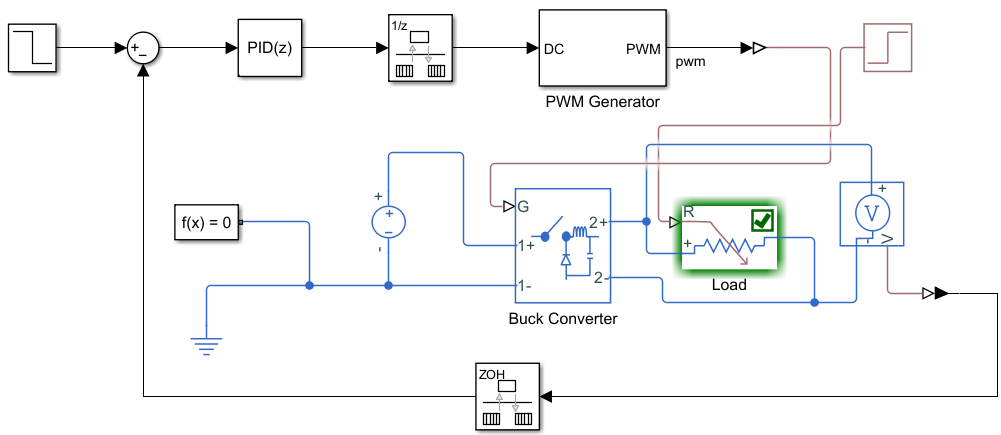